In [2]:
import numpy as np
import torch
from torch import nn, optim, Tensor
import torch.utils.data as Data
import os
import sys
sys.path.append('../')
import utils.csv as csv
import utils.validation as val
from torchmetrics.classification import MultilabelAccuracy
import pandas as pd
from matplotlib import pyplot as plt

d:\LenovoSoftstore\Anaconda\envs\yolov5\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# file path
PATH='D:\\Deutschland\\FUB\\master_thesis\\data\\gee\\output'
DATA_DIR = os.path.join(PATH, 'daily_padding')
LABEL_CSV = 'label_multi.csv'

label_path = os.path.join(PATH, LABEL_CSV)

In [4]:
y_true = torch.tensor([[1,1,1], [0,0,0], [1,1,1], [1,0,1]])
y_pred = torch.tensor([[1,0,0], [1,1,1], [1,1,1], [1,0,0]])
ref = pd.read_csv('../outputs/csv/multi_label/01/lstm_7ml_ref.csv', sep=',', header=0,)
pred = pd.read_csv('../outputs/csv/multi_label/01/lstm_7ml_pred.csv', sep=',', header=0,)
res = (ref == pred).sum(axis=1)

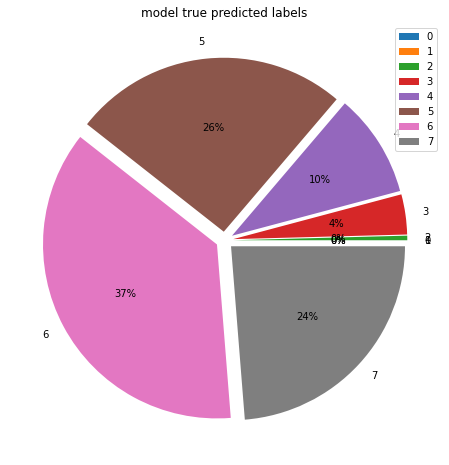

In [5]:
x = []
labels = []
gaps = []
plt.figure(figsize=(8,8))
for i in range(ref.shape[1]+1):
    num = (res == i).sum()
    x.append(num)
    labels.append(i)
    gaps.append(0.05)
plt.pie(x, labels=labels, explode=gaps, autopct='%.0f%%', textprops={"size":10})
plt.title('model true predicted labels')
plt.legend()
plt.show()